
Qualidade 10 
Serviço 4 
Gorjeta de 17.76


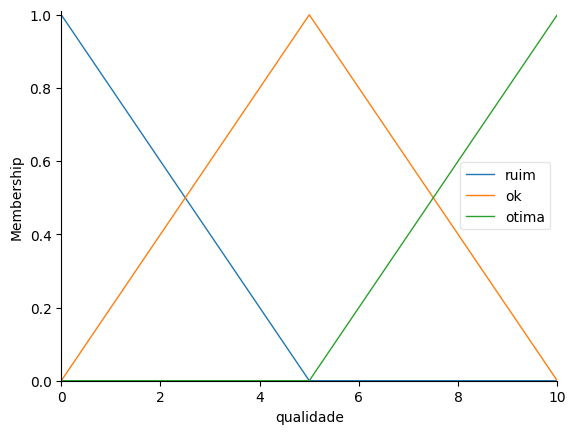

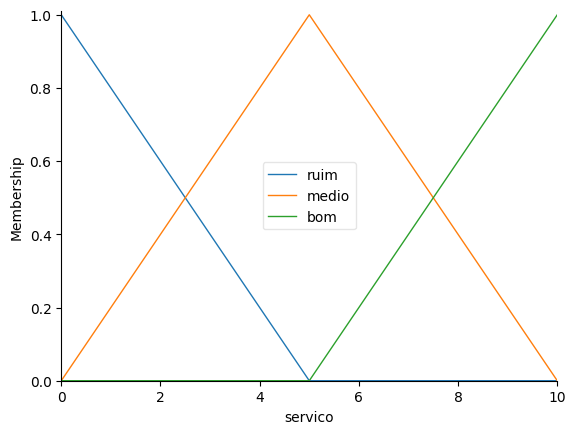

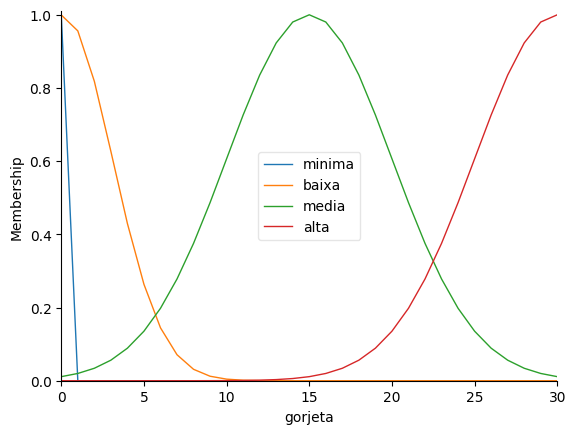

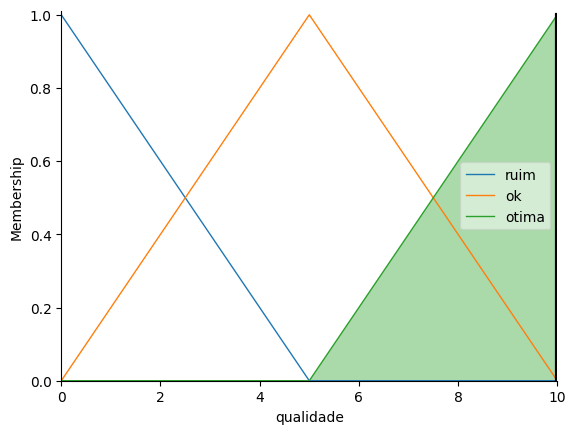

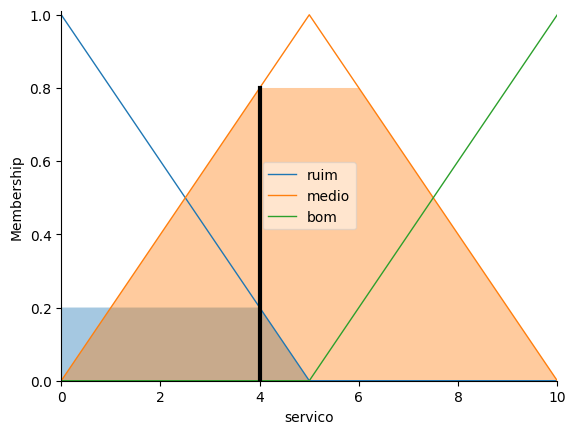

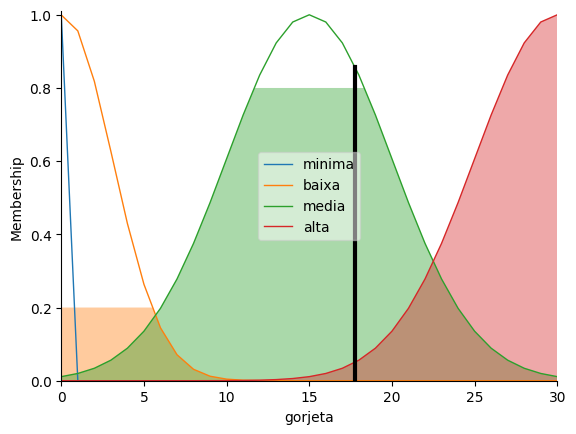

In [2]:
#pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

#Variaveis de saída (Consequent)
gorjeta = ctrl.Consequent(np.arange(0, 31, 1), 'gorjeta')

# automf -> Atribuição de categorias automaticamente
qualidade.automf(names=['ruim','ok','otima'],)
servico.automf(names=['ruim','medio','bom'])

# atribuicao sem o automf
gorjeta['minima'] = fuzz.gaussmf(gorjeta.universe, 0,.1)
gorjeta['baixa'] = fuzz.gaussmf(gorjeta.universe, .1, 3)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 15,5)
gorjeta['alta'] = fuzz.gaussmf(gorjeta.universe, 30,5)


#Visualizando as variáveis
qualidade.view()
servico.view()
gorjeta.view()



#Criando as regras
regra_1 = ctrl.Rule(qualidade['ruim'] & servico['ruim'], gorjeta['minima'])
regra_2 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra_3 = ctrl.Rule(servico['medio'], gorjeta['media'])
regra_4 = ctrl.Rule(servico['bom'] | qualidade['otima'], gorjeta['alta'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3,regra_4])


#Simulando
CalculoGorjeta = ctrl.ControlSystemSimulation(controlador)

notaQualidade = int(input('Qualidade: '))
notaServico = int(input('Servico: '))
CalculoGorjeta.input['qualidade'] = notaQualidade
CalculoGorjeta.input['servico'] = notaServico
CalculoGorjeta.compute()

valorGorjeta = CalculoGorjeta.output['gorjeta']

print("\nQualidade %d \nServiço %d \nGorjeta de %5.2f" %(
        notaQualidade,
        notaServico,
        valorGorjeta))


qualidade.view(sim=CalculoGorjeta)
servico.view(sim=CalculoGorjeta)
gorjeta.view(sim=CalculoGorjeta)

plt.show()